# Capestone Project

### This notebook will be used for the final project


*Let's get __started!!!!!__*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from datetime import datetime as dt
from sklearn.model_selection import cross_val_predict
import warnings
import plotly
import plotly.offline as py
import plotly.graph_objs as go
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing

In [95]:
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


In [ ]:
# The code was removed by Watson Studio for sharing.

In [ ]:

body = client_0760c50cd4724b33a294d3696a4e7cc9.get_object(Bucket='capstoneproject-donotdelete-pr-8ntsdyiamswqfl',Key='dftRoadSafetyData_Accidents_2018.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

dfa = pd.read_csv(body)
dfa.head()


In [ ]:
print(dfa.shape)
print(dfc.shape)

In [6]:
#Join the datasets byb accident ID
df = dfa.merge(dfc, on = 'Accident_Index', how = 'left')

In [7]:
df.shape
df.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
0,2018010080971,529150.0,182270.0,-0.139737,51.524587,1,3,2,2,01/01/2018,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018010080973,542020.0,184290.0,0.046471,51.539651,1,3,1,1,01/01/2018,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018010080974,531720.0,182910.0,-0.102474,51.529746,1,3,2,1,01/01/2018,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018010080981,541450.0,183220.0,0.037828,51.530179,1,2,2,1,01/01/2018,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018010080982,543580.0,176500.0,0.065781,51.469258,1,2,2,2,01/01/2018,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.labels()

AttributeError: 'DataFrame' object has no attribute 'labels'

In [8]:
#graphically see the missing data

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157342 entries, 0 to 157341
Data columns (total 47 columns):
Accident_Index                                 157342 non-null object
Location_Easting_OSGR                          157269 non-null float64
Location_Northing_OSGR                         157269 non-null float64
Longitude                                      157269 non-null float64
Latitude                                       157269 non-null float64
Police_Force                                   157342 non-null int64
Accident_Severity                              157342 non-null int64
Number_of_Vehicles                             157342 non-null int64
Number_of_Casualties                           157342 non-null int64
Date                                           157342 non-null object
Day_of_Week                                    157342 non-null int64
Time                                           157322 non-null object
Local_Authority_(District)                     157

In [9]:
df.describe()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),...,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
count,157269.000000,1.572690e+05,157269.000000,157269.000000,157342.000000,157342.000000,157342.000000,157342.000000,157342.000000,157342.000000,...,140958.000000,140958.000000,140958.000000,140958.000000,140958.000000,140958.000000,140958.000000,140958.000000,140958.000000,140958.000000
mean,447943.473520,2.871571e+05,-1.314510,52.471790,29.443156,2.763795,1.934493,1.730314,4.094399,340.198726,...,6.375112,2.812412,0.731892,0.570652,0.257559,0.063934,0.046581,7.483350,1.094950,3.978220
std,96035.676116,1.541798e+05,1.408334,1.388763,24.628485,0.464503,0.799824,1.710146,1.954564,253.689571,...,2.447588,0.420363,2.096956,1.882499,0.581432,0.485345,0.301863,8.577465,0.967623,3.484258
min,84654.000000,1.023500e+04,-7.266148,49.912362,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,-1.000000,1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,384163.000000,1.760800e+05,-2.238640,51.471515,6.000000,3.000000,1.000000,1.000000,2.000000,102.000000,...,5.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,1.000000
50%,452462.000000,2.414630e+05,-1.224314,52.053177,30.000000,3.000000,2.000000,1.000000,4.000000,323.000000,...,6.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,4.000000
75%,527610.000000,3.909960e+05,-0.159904,53.413146,45.000000,3.000000,2.000000,2.000000,6.000000,516.000000,...,8.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,7.000000
max,655275.000000,1.209512e+06,1.758123,60.763722,98.000000,3.000000,24.000000,59.000000,7.000000,941.000000,...,11.000000,3.000000,10.000000,9.000000,2.000000,4.000000,2.000000,98.000000,3.000000,10.000000


In [279]:
df.isnull().sum()

Accident_Index                                     0
Location_Easting_OSGR                             73
Location_Northing_OSGR                            73
Longitude                                         73
Latitude                                          73
Police_Force                                       0
Accident_Severity                                  0
Number_of_Vehicles                                 0
Number_of_Casualties                               0
Date                                               0
Day_of_Week                                        0
Time                                              20
Local_Authority_(District)                         0
Local_Authority_(Highway)                          0
1st_Road_Class                                     0
1st_Road_Number                                    0
Road_Type                                          0
Speed_limit                                        0
Junction_Detail                               

In [280]:
na_percentages = []
lam = lambda x: np.round(100*df[[x]].isnull().sum().sum()/len(df),2)

In [281]:
for col in list(df):
    na_percentages.append(lam(col))

In [282]:
msdata = pd.DataFrame({'Variable': list(df),
                        'NA Percentage': na_percentages})

In [283]:
msdata = msdata[msdata['NA Percentage'] > 0.00].sort_values('NA Percentage', ascending = True).reset_index(drop = True)

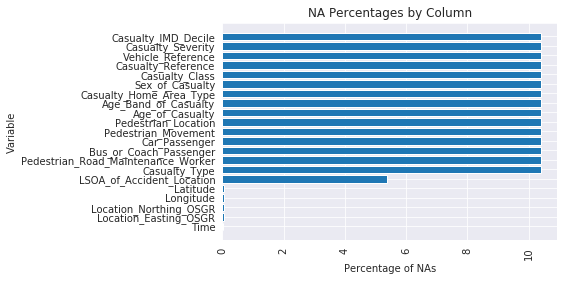

In [284]:
# Plot to show Missing data percentage
plt.barh(msdata['Variable'], msdata['NA Percentage'])
plt.title('NA Percentages by Column') 
plt.xlabel('Percentage of NAs') 
plt.ylabel('Variable') 
plt.xticks(rotation = 90) 
plt.show()

In [110]:
def impute_median(series):
    return series.fillna(series.median())

In [112]:
def impute_mean(series):
    return series.fillna(series.mean())


In [116]:
#Modes of categorical values
print(df['Casualty_Severity'].mode())


0    3.0
dtype: float64


In [285]:
#checking the correlation between accident severity and casualty severity
df[['Accident_Severity', 'Casualty_Severity']].corr()

,Accident_Severity,Casualty_Severity
Accident_Severity,1.000000,0.851583
Casualty_Severity,0.851583,1.000000


In [287]:
df['Casualty_Severity'].fillna(str(df['Accident_Severity'].values[0]), inplace=True) 

In [288]:
df.isnull().sum()

Accident_Index                                     0
Location_Easting_OSGR                             73
Location_Northing_OSGR                            73
Longitude                                         73
Latitude                                          73
Police_Force                                       0
Accident_Severity                                  0
Number_of_Vehicles                                 0
Number_of_Casualties                               0
Date                                               0
Day_of_Week                                        0
Time                                              20
Local_Authority_(District)                         0
Local_Authority_(Highway)                          0
1st_Road_Class                                     0
1st_Road_Number                                    0
Road_Type                                          0
Speed_limit                                        0
Junction_Detail                               

In [289]:
df = df.dropna()

In [290]:
df.shape

(132500, 47)

In [291]:
df['Accident_Severity'].value_counts()

3    102837
2     27213
1      2450
Name: Accident_Severity, dtype: int64

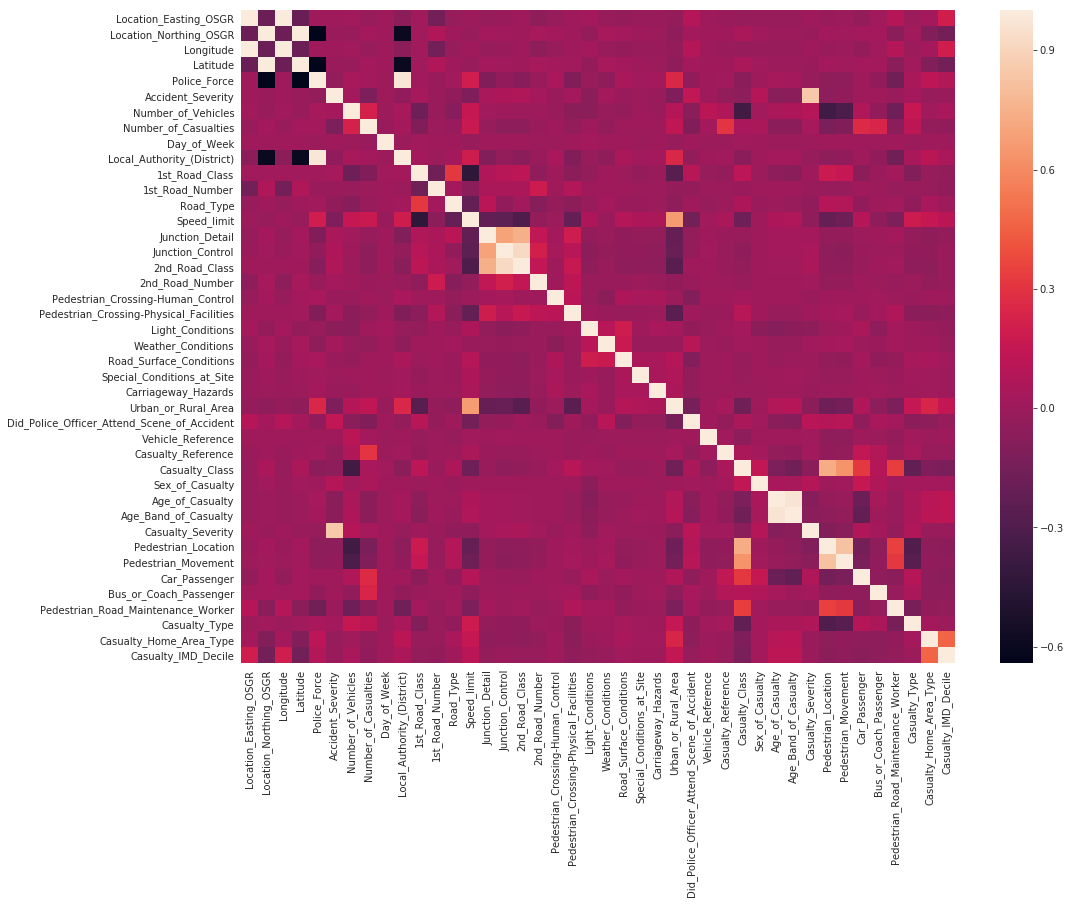

In [230]:
fig, ax = plt.subplots(figsize=(16, 12))
ax = sns.heatmap(df.corr())#cbar=False)

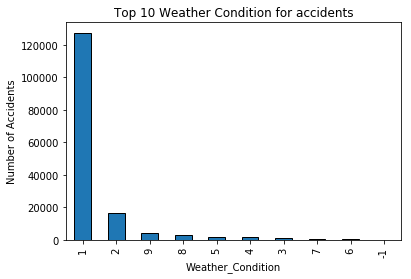

In [11]:
fig, ax=plt.subplots()
df['Weather_Conditions'].value_counts().sort_values(ascending=False).head(10).plot.bar(width=0.5,edgecolor='k',align='center')
plt.xlabel('Weather_Condition')
plt.ylabel('Number of Accidents')
ax.tick_params()
plt.title('Top 10 Weather Condition for accidents')
plt.ioff()

In [ ]:
df1 = df['Accident_Severity', 'Weather_Conditions']
per = df1.plot(kind='bar', 
            figsize=(20, 8), 
            width=0.8, 
            color=['#5cb85c', '#5bc0de'],
           )

per.tick_params(labelsize=14)
per.legend(fontsize=14)
for p in per.patches:
    per.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14
               )
plt.show()

In [265]:
df['month'] = pd.DatetimeIndex(df['Date']).month


In [266]:
df['Year'] = pd.DatetimeIndex(df['Date']).year


In [270]:

df['month'] = df['month'].map({1:'January', 2:'February', 3: 'March', 4:'April', 5:'May', 6:'June', 7:'July',
                                  8:'August', 9:'September', 10: 'October', 11:'November', 12:'December'})

In [294]:
df.drop(['Location_Easting_OSGR', 'Location_Northing_OSGR'],axis = 1, inplace = True)

In [295]:
df.head()

,Accident_Index,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,...,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
16384,2018010130027,-0.215455,51.556878,1,3,2,1,01/09/2018,7,12:48,...,6.0,3,0.0,0.0,0.0,0.0,0.0,3.0,1.0,6.0
16385,2018010130028,-0.299739,51.552014,1,3,1,2,01/09/2018,7,14:00,...,6.0,3,0.0,0.0,0.0,2.0,0.0,11.0,1.0,3.0
16386,2018010130028,-0.299739,51.552014,1,3,1,2,01/09/2018,7,14:00,...,1.0,3,0.0,0.0,0.0,2.0,0.0,11.0,1.0,3.0
16387,2018010130030,0.057318,51.524353,1,3,2,2,01/09/2018,7,11:40,...,7.0,3,0.0,0.0,0.0,0.0,0.0,9.0,1.0,4.0
16388,2018010130030,0.057318,51.524353,1,3,2,2,01/09/2018,7,11:40,...,7.0,3,0.0,0.0,2.0,0.0,0.0,9.0,1.0,4.0


In [296]:
df['Accident_Severity'].value_counts()

3    102837
2     27213
1      2450
Name: Accident_Severity, dtype: int64

In [297]:
df.dropna()

,Accident_Index,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,...,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
16384,2018010130027,-0.215455,51.556878,1,3,2,1,01/09/2018,7,12:48,...,6.0,3,0.0,0.0,0.0,0.0,0.0,3.0,1.0,6.0
16385,2018010130028,-0.299739,51.552014,1,3,1,2,01/09/2018,7,14:00,...,6.0,3,0.0,0.0,0.0,2.0,0.0,11.0,1.0,3.0
16386,2018010130028,-0.299739,51.552014,1,3,1,2,01/09/2018,7,14:00,...,1.0,3,0.0,0.0,0.0,2.0,0.0,11.0,1.0,3.0
16387,2018010130030,0.057318,51.524353,1,3,2,2,01/09/2018,7,11:40,...,7.0,3,0.0,0.0,0.0,0.0,0.0,9.0,1.0,4.0
16388,2018010130030,0.057318,51.524353,1,3,2,2,01/09/2018,7,11:40,...,7.0,3,0.0,0.0,2.0,0.0,0.0,9.0,1.0,4.0
16389,2018010130031,0.083795,51.485396,1,3,1,1,01/09/2018,7,13:58,...,9.0,3,0.0,0.0,0.0,3.0,0.0,11.0,1.0,4.0
16390,2018010130032,-0.193214,51.375245,1,3,3,1,01/09/2018,7,13:20,...,2.0,3,0.0,0.0,1.0,0.0,0.0,9.0,1.0,4.0
16391,2018010130034,0.058201,51.521550,1,3,2,1,01/09/2018,7,12:40,...,4.0,3,0.0,0.0,1.0,0.0,0.0,9.0,1.0,2.0
16392,2018010130052,-0.029670,51.583040,1,3,2,1,01/09/2018,7,15:15,...,6.0,3,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0
16393,2018010130054,0.130356,51.566484,1,3,2,2,28/04/2018,7,21:00,...,6.0,3,0.0,0.0,0.0,0.0,0.0,9.0,1.0,2.0


In [244]:
df.fillna(0, inplace=True)
df.isnull().sum()

Accident_Index                                 0
Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Day_of_Week                                    0
Time                                           0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
1st_Road_Class                                 0
1st_Road_Number                                0
Road_Type                                      0
Speed_limit                                    0
Junction_Detail                                0
Junction_Control                               0
2nd_Road_Class                                 0
2nd_Road_Number                                0
Pedestrian_Crossing-

### Create Fatal Severity Dataset

In [299]:
df_fatal = df.loc[df['Accident_Severity'] == 1]
df_fatal

,Accident_Index,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,...,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
16749,2018010130813,0.016184,51.572189,1,1,2,2,06/09/2018,5,02:25,...,6.0,1,0.0,0.0,0.0,0.0,0.0,9.0,1.0,3.0
16750,2018010130813,0.016184,51.572189,1,1,2,2,06/09/2018,5,02:25,...,5.0,2,0.0,0.0,0.0,0.0,0.0,9.0,1.0,4.0
16911,2018010131238,-0.141857,51.543326,1,1,1,1,07/09/2018,6,17:10,...,5.0,1,0.0,0.0,0.0,0.0,0.0,5.0,1.0,6.0
17096,2018010131682,-0.160104,51.684345,1,1,2,4,10/09/2018,2,10:00,...,-1.0,2,0.0,0.0,0.0,0.0,0.0,9.0,1.0,7.0
17097,2018010131682,-0.160104,51.684345,1,1,2,4,10/09/2018,2,10:00,...,-1.0,3,0.0,0.0,1.0,0.0,0.0,9.0,-1.0,-1.0
17098,2018010131682,-0.160104,51.684345,1,1,2,4,10/09/2018,2,10:00,...,6.0,3,0.0,0.0,2.0,0.0,0.0,9.0,1.0,1.0
17099,2018010131682,-0.160104,51.684345,1,1,2,4,10/09/2018,2,10:00,...,8.0,1,0.0,0.0,0.0,0.0,0.0,9.0,-1.0,-1.0
17101,2018010131685,-0.098948,51.683460,1,1,1,1,10/09/2018,2,12:00,...,11.0,1,9.0,9.0,0.0,0.0,2.0,0.0,1.0,3.0
17248,2018010132042,-0.436218,51.589072,1,1,1,2,12/09/2018,4,01:45,...,4.0,1,0.0,0.0,0.0,0.0,0.0,9.0,-1.0,-1.0
17249,2018010132042,-0.436218,51.589072,1,1,1,2,12/09/2018,4,01:45,...,4.0,2,0.0,0.0,1.0,0.0,0.0,9.0,-1.0,-1.0


## Fatal accidents

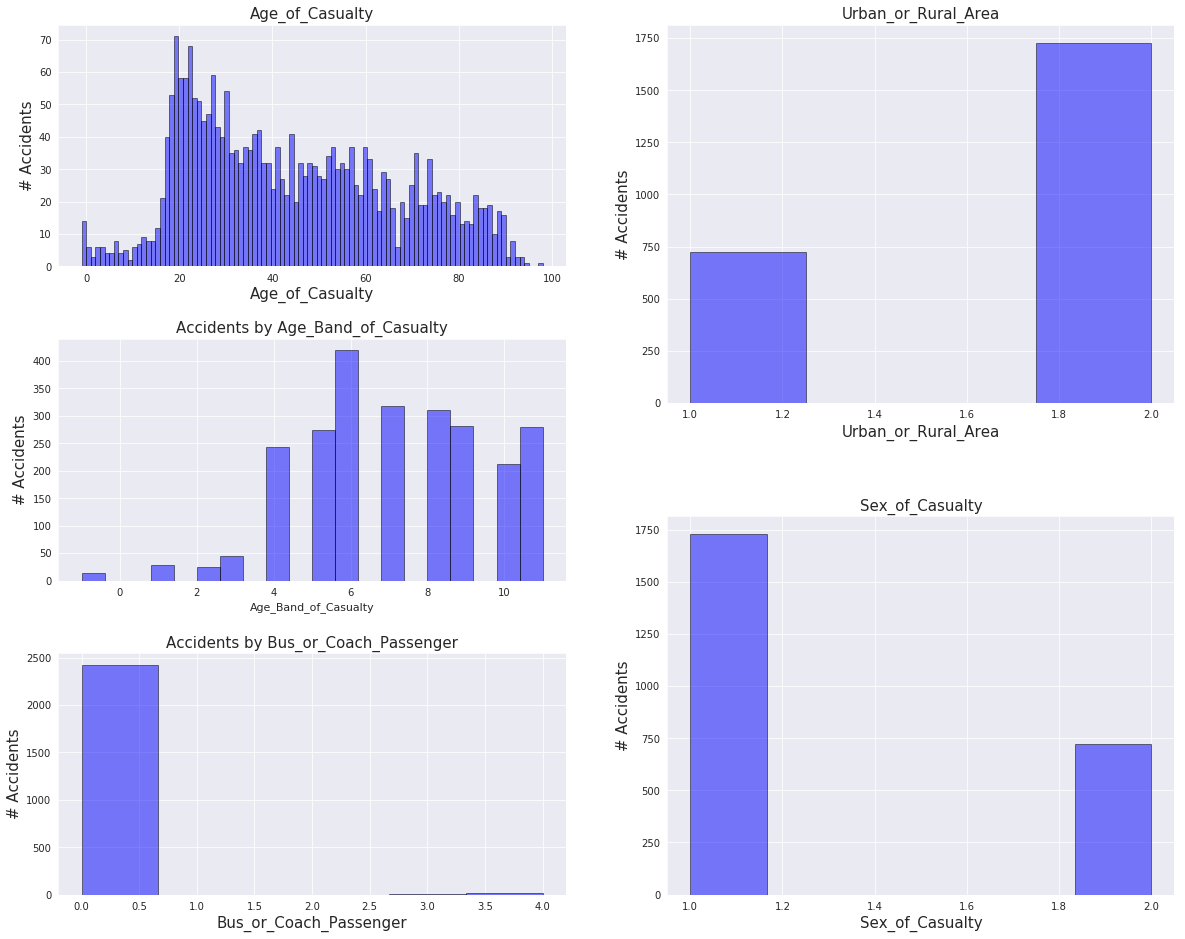

In [300]:
# Subplots of Numeric Features
sns.set_style('darkgrid')
fig = plt.figure(figsize = (20,16))
fig.subplots_adjust(hspace = .30)

ax1 = fig.add_subplot(321)
ax1.hist(df_fatal['Age_of_Casualty'], bins = 100, alpha = .50,edgecolor= 'black',color ='blue')
ax1.set_xlabel('Age_of_Casualty', labelpad=3, fontsize = 15)
#ax1.set_xticklabels(['Fatal', 'Serious', 'Slight'], rotation=90)
ax1.set_ylabel('# Accidents',fontsize = 15)
ax1.set_title('Age_of_Casualty',fontsize = 15)

ax2 = fig.add_subplot(323)
ax2.hist(df_fatal['Age_Band_of_Casualty'], bins = 20, alpha = .50,edgecolor= 'black',color ='blue')
ax2.set_xlabel('Age_Band_of_Casualty',fontsize = 11)
ax2.set_ylabel('# Accidents',fontsize = 15)
ax2.set_title('Accidents by Age_Band_of_Casualty',fontsize = 15)

ax3 = fig.add_subplot(325)
ax3.hist(df_fatal['Bus_or_Coach_Passenger'], bins = 6, alpha = .50,edgecolor= 'black',color ='blue')
ax3.set_xlabel('Bus_or_Coach_Passenger',fontsize = 15)
ax3.set_ylabel('# Accidents',fontsize = 15)
ax3.set_title('Accidents by Bus_or_Coach_Passenger',fontsize = 15)

ax4 = fig.add_subplot(222)
ax4.hist(df_fatal['Urban_or_Rural_Area'], bins = 4, alpha = .50,edgecolor= 'black',color ='blue')
ax4.set_xlabel('Urban_or_Rural_Area',fontsize = 15)
ax4.set_ylabel('# Accidents',fontsize = 15)
ax4.set_title('Urban_or_Rural_Area',fontsize = 15)

ax5 = fig.add_subplot(224)
ax5.hist(df_fatal['Sex_of_Casualty'], bins = 6, alpha = .50,edgecolor= 'black',color ='blue')
ax5.set_xlabel('Sex_of_Casualty',fontsize = 15)
ax5.set_ylabel('# Accidents',fontsize = 15)
ax5.set_title('Sex_of_Casualty',fontsize = 15)

plt.show()


In [301]:
df_fatal['Urban_or_Rural_Area'].value_counts()

2    1727
1     723
Name: Urban_or_Rural_Area, dtype: int64

In [302]:
# share of fatal accident in Rural area
print(f'Share of fatal car accidents in Rural Area {(1727/(1727+723)*100)}%')
print(f'Fatal car accidents in Rural Area happens {round((1727/723), 2)} times more than in Urban')

Share of fatal car accidents in Rural Area 70.48979591836735%
Fatal car accidents in Rural Area happens 2.39 times more than in Urban


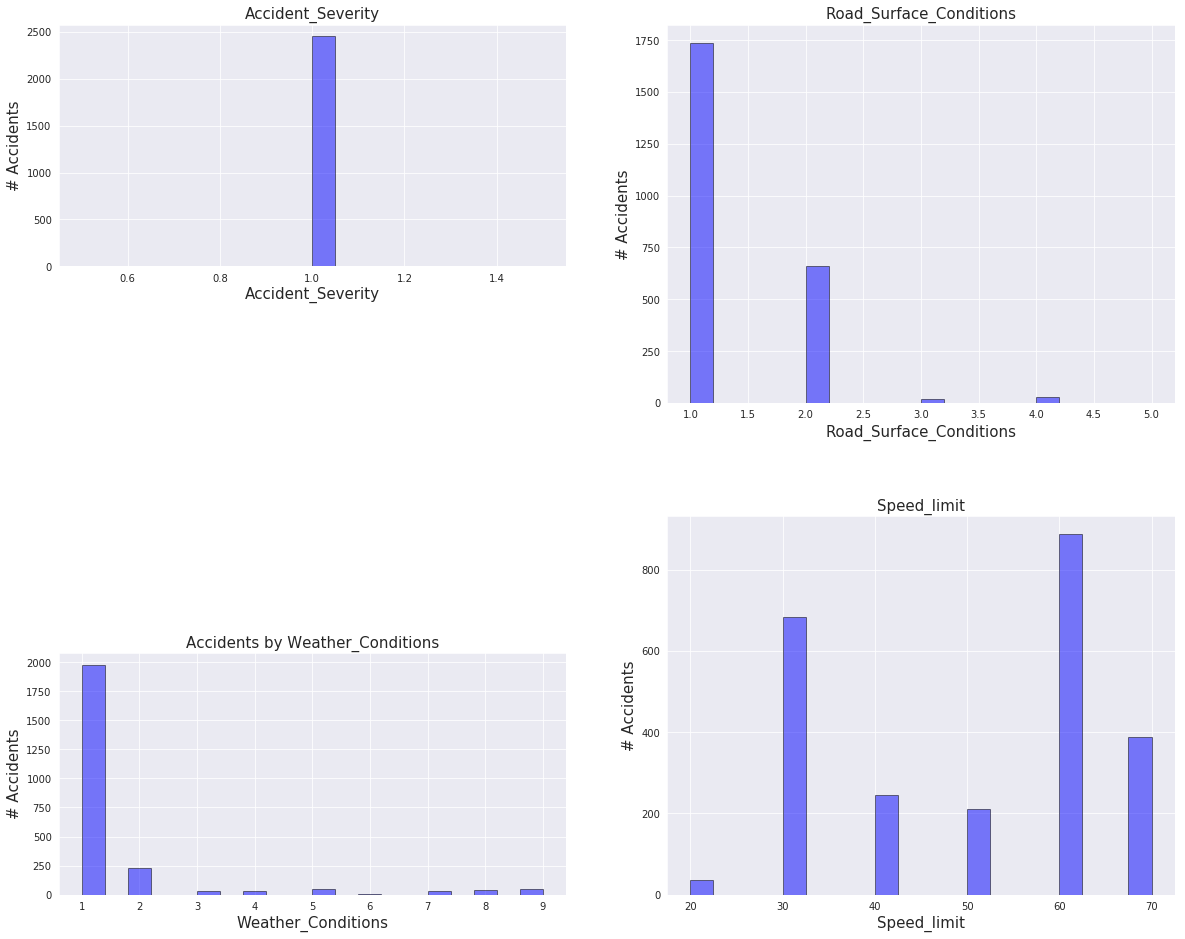

In [303]:
# Subplots of Numeric Features
sns.set_style('darkgrid')
fig = plt.figure(figsize = (20,16))
fig.subplots_adjust(hspace = .30)

ax1 = fig.add_subplot(321)
ax1.hist(df_fatal['Accident_Severity'], bins = 20, alpha = .50,edgecolor= 'black',color ='blue')
ax1.set_xlabel('Accident_Severity', labelpad=3, fontsize = 15)
#ax1.set_xticklabels(['Fatal', 'Serious', 'Slight'], rotation=90)
ax1.set_ylabel('# Accidents',fontsize = 15)
ax1.set_title('Accident_Severity',fontsize = 15)



ax3 = fig.add_subplot(325)
ax3.hist(df_fatal['Weather_Conditions'], bins = 20, alpha = .50,edgecolor= 'black',color ='blue')
ax3.set_xlabel('Weather_Conditions',fontsize = 15)
ax3.set_ylabel('# Accidents',fontsize = 15)
ax3.set_title('Accidents by Weather_Conditions',fontsize = 15)

ax4 = fig.add_subplot(222)
ax4.hist(df_fatal['Road_Surface_Conditions'], bins = 20, alpha = .50,edgecolor= 'black',color ='blue')
ax4.set_xlabel('Road_Surface_Conditions',fontsize = 15)
ax4.set_ylabel('# Accidents',fontsize = 15)
ax4.set_title('Road_Surface_Conditions',fontsize = 15)

ax5 = fig.add_subplot(224)
ax5.hist(df_fatal['Speed_limit'], bins = 20, alpha = .50,edgecolor= 'black',color ='blue')
ax5.set_xlabel('Speed_limit',fontsize = 15)
ax5.set_ylabel('# Accidents',fontsize = 15)
ax5.set_title('Speed_limit',fontsize = 15)

plt.show()




In [ ]:
!conda install -c anaconda seaborn -y

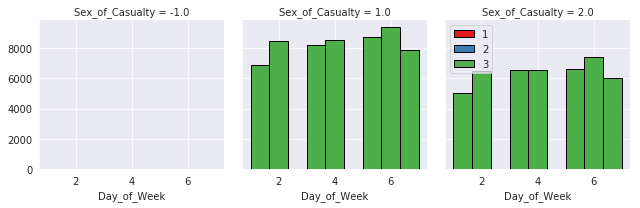

In [304]:
import seaborn as sns

bins = np.linspace(df.Day_of_Week.min(), df.Day_of_Week.max(), 10)
g = sns.FacetGrid(df, col="Sex_of_Casualty", hue="Accident_Severity", palette="Set1", col_wrap=3)
g.map(plt.hist, 'Day_of_Week', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

In [305]:
df['Accident_Severity'].value_counts()

3    102837
2     27213
1      2450
Name: Accident_Severity, dtype: int64

In [306]:
df['Severity_dummy'] = np.where(df['Accident_Severity']==3, 0, 1)

In [307]:
df['Severity_dummy'].value_counts()

0    102837
1     29663
Name: Severity_dummy, dtype: int64

In [308]:
df['Sex_of_Casualty'].value_counts()

 1.0    77901
 2.0    54569
-1.0       30
Name: Sex_of_Casualty, dtype: int64

In [309]:
df_fatal['Sex_of_Casualty'].value_counts()

1.0    1727
2.0     723
Name: Sex_of_Casualty, dtype: int64

In [310]:
print(f'Share of Females in accidents: {(54569/(77901+54569)*100)}%')
print(f'Share of Females in fatal accidents: {(723/(1727+723)*100)}%')

Share of Females in accidents: 41.19347776855137%
Share of Females in fatal accidents: 29.51020408163265%


In [311]:
target = 'Severity_dummy'

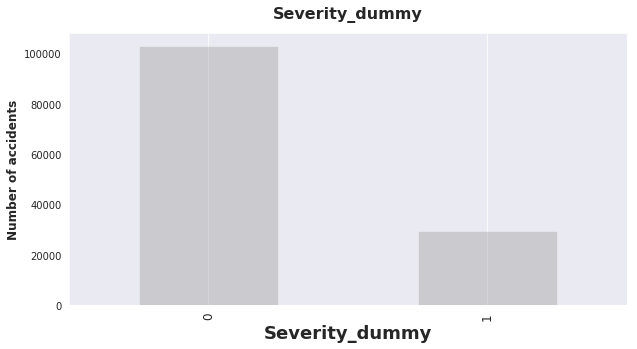

In [312]:
#plt(df['Casualty_Class'].value_counts())
fig, ax = plt.subplots(figsize=(10, 5))
ax = df.groupby(target)['Number_of_Casualties'].count().plot(kind='bar', color='grey', alpha=0.3);
plt.grid(axis='y', alpha=0.5, linestyle='--', linewidth=0.3)
plt.xlabel(target, fontsize=18, fontweight='bold')
plt.xticks(fontsize=12)
plt.ylabel('Number of accidents', fontsize=12, fontweight='bold')
plt.yticks(fontsize=10)
plt.title(f'Severity_dummy', pad=15, fontsize=16, fontweight='bold');
#fig.savefig('Average Reviews_per_month by room type.jpg', bbox_inches='tight')

### Modeling

In [313]:
from sklearn.preprocessing import StandardScaler
# Separating out the features and target variables
features = ['Number_of_Vehicles', 'Accident_Severity', 'Number_of_Casualties', 'Day_of_Week', '1st_Road_Class', '1st_Road_Number', 
                    'Road_Type', 'Speed_limit', 'Junction_Detail', 'Junction_Control', '2nd_Road_Class', 
                    '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities', 
                    'Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions', 'Special_Conditions_at_Site', 
                    'Carriageway_Hazards', 'Urban_or_Rural_Area','Vehicle_Reference', 'Casualty_Reference', 
                    'Casualty_Class', 'Sex_of_Casualty', 'Age_of_Casualty', 'Age_Band_of_Casualty', 
                    'Pedestrian_Location', 'Pedestrian_Movement', 'Car_Passenger', 'Bus_or_Coach_Passenger',
                    'Pedestrian_Road_Maintenance_Worker', 'Casualty_Type', 'Casualty_Home_Area_Type']

x = df[features]
y = df[target]

In [314]:
len(features)


33

## Normalize the Data

In [315]:
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [316]:
labels = ['Number_of_Vehicles', 'Number_of_Casualties', 'Day_of_Week', '1st_Road_Class', '1st_Road_Number', 
                    'Road_Type', 'Speed_limit', 'Junction_Detail', 'Junction_Control', '2nd_Road_Class', 
                    '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities', 
                    'Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions', 'Special_Conditions_at_Site', 
                    'Carriageway_Hazards', 'Urban_or_Rural_Area','Vehicle_Reference', 'Casualty_Reference', 
                    'Casualty_Class', 'Sex_of_Casualty', 'Age_of_Casualty', 'Age_Band_of_Casualty', 
                    'Pedestrian_Location', 'Pedestrian_Movement', 'Car_Passenger', 'Bus_or_Coach_Passenger',
                    'Pedestrian_Road_Maintenance_Worker', 'Casualty_Type', 'Casualty_Home_Area_Type']

target = 'Severity_dummy'

## Logistic regression

In [317]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
Xl = df[labels]
yl = df[target]
X_trainl, X_testl, y_trainl, y_testl = train_test_split(Xl, yl, test_size=0.2, random_state=1)
logreg = LogisticRegression().fit(X_trainl, y_trainl)

y_predl = logreg.predict(X_testl)
accuracy2 = logreg.score(Xl, yl, sample_weight=None)
print("Accuracy: %.2f%%" % (accuracy2 * 100.0))


Accuracy: 77.81%


Confusion matrix for LOGISTIC regression:
 [[20444   155]
 [ 5677   224]]


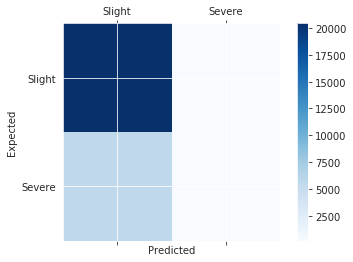

In [336]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_matl = confusion_matrix(y_true=y_testl, y_pred=y_predl)
print('Confusion matrix for LOGISTIC regression:\n', conf_matl)

labelsl = ['Slight', 'Severe']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_matl, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labelsl)
ax.set_yticklabels([''] + labelsl)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()


In [337]:
from sklearn import metrics
THRESHOLD = 0.0
preds = np.where(logreg.predict(X_testl) > THRESHOLD, 1, 0)

pd.DataFrame(data=[metrics.accuracy_score(y_true=y_testl, y_pred=y_predl), metrics.recall_score(y_true=y_testl, y_pred=y_predl),
                   metrics.precision_score(y_true=y_testl, y_pred=y_predl), metrics.f1_score(y_true=y_testl, y_pred=y_predl)], 
             index=["accuracy", "recall", "precision", "F1"])

,0
accuracy,0.779925
recall,0.037960
precision,0.591029
F1,0.071338


In [339]:
!pip install imblearn  

     |████████████████████████████████| 174kB 10.6MB/s eta 0:00:01
     |████████████████████████████████| 6.8MB 16.1MB/s eta 0:00:01
     |████████████████████████████████| 307kB 36.8MB/s eta 0:00:01
ERROR: autoai-libs 1.10.5 has requirement numpy>=1.16.4, but you'll have numpy 1.15.4 which is incompatible.
ERROR: autoai-libs 1.10.5 has requirement pandas>=0.24.2, but you'll have pandas 0.24.1 which is incompatible.
ERROR: autoai-libs 1.10.5 has requirement scikit-learn==0.20.3, but you'll have scikit-learn 0.23.2 which is incompatible.
  Found existing installation: scikit-learn 0.20.3
    Uninstalling scikit-learn-0.20.3:
      Successfully uninstalled scikit-learn-0.20.3


## Decision Tree Model

In [185]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)
#Modelling
Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 6)
Tree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [186]:
Tree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [194]:
Tree.feature_importances_

array([0.05803257, 0.33938072, 0.00250939, 0.00366518, 0.00637134,
       0.02824887, 0.08462715, 0.00093597, 0.        , 0.        ,
       0.00133718, 0.        , 0.00076548, 0.02445083, 0.0011247 ,
       0.        , 0.        , 0.        , 0.14411607, 0.02681934,
       0.        , 0.002395  , 0.01073965, 0.0557591 , 0.00393453,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.20478692, 0.        ])

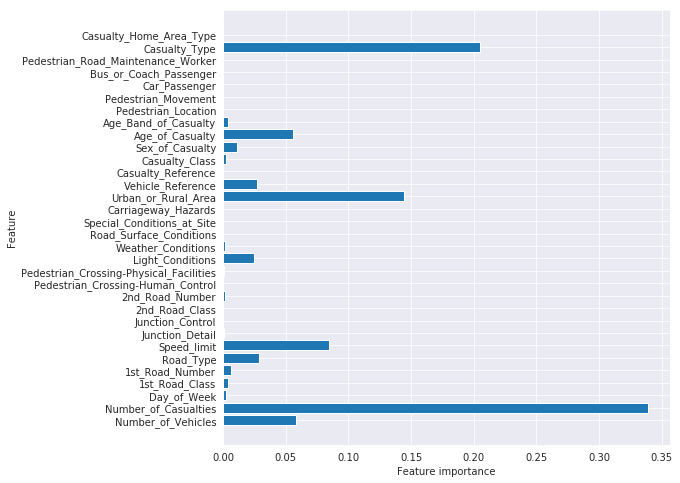

In [195]:
def plot_feature_importances(model):
    n_features = X_trainset.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_trainset.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(Tree)

In [196]:
predTree = Tree.predict(X_testset)
print (predTree [0:9])
print (y_testset [0:9])
from sklearn import metrics

print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))
print(classification_report(y_testset, predTree))
print('Accuracy of the model')
print(accuracy_score(y_testset, predTree))

[0 0 0 0 0 0 0 0 0]
114879    1
137085    0
98039     0
140372    0
54037     0
116082    0
142288    1
98939     0
16924     0
Name: Severity_dummy, dtype: int64
DecisionTrees's Accuracy:  0.7811069182389937
              precision    recall  f1-score   support

           0       0.79      0.98      0.87     30811
           1       0.59      0.08      0.15      8939

   micro avg       0.78      0.78      0.78     39750
   macro avg       0.69      0.53      0.51     39750
weighted avg       0.74      0.78      0.71     39750

Accuracy of the model
0.7811069182389937


## KNN

In [188]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (106000, 32) (106000,)
Test set: (26500, 32) (26500,)


Train set Accuracy:  0.8097264150943396
Test set Accuracy:  0.7608301886792452


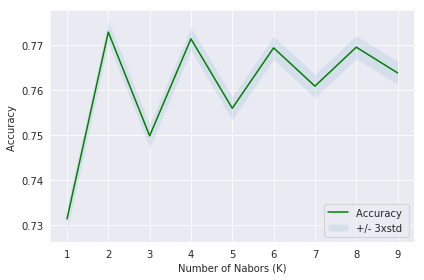

Best accuracy: 0.7728301886792452 k= 2


In [189]:
from sklearn.neighbors import KNeighborsClassifier
k = 7

#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

yhat = neigh.predict(X_test)
yhat[0:6]

from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

ConfustionMx = [];
for n in range(1,Ks):
    
    
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()
print( "Best accuracy:", mean_acc.max(), "k=", mean_acc.argmax()+1)


In [ ]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
yhatKNN=neigh.predict(X)
KNNJaccard = jaccard_similarity_score(y, yhatKNN)
KNNF1 = f1_score(y, yhatKNN, average='weighted')
print("Avg F1-score: %.2f" % KNNF1 )
print("KNN Jaccard Score: %.2f" % KNNJaccard)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
X = df[labels]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=1)

#using random forest for training data 
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
print("Training accuracy for Random Forest:", round(acc_random_forest,2,), "%")

In [ ]:

#using random forest for testing data
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_test, y_test) * 100, 2)
print("Testing accuracy for Random Forest:", round(acc_random_forest,2,), "%")

In [ ]:
importances = pd.DataFrame({'feature':data.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

In [ ]:
importances.plot.bar(stacked=False)